In [0]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Steps we are going to follow

1. Load MNIST dataset
2. Build the model
3. Train the model
4. Evaluate the model
5. Make predictions

## Load MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist 
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train/255.0
X_test  = X_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


## Instantiate the model

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # Type of regularization in NN, probability set to 20% 
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # New in this problem, sparse means array contains mostly zeros
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [5]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0900 - val_accuracy: 0.9777
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0984 - val_accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.1017 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0916 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0872 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.1025 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.1012 - val_accuracy:

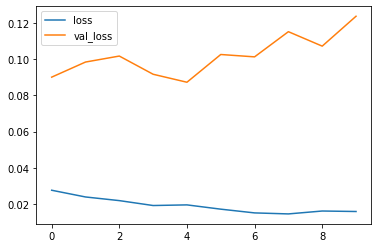

In [6]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend() # WHich line represents which 

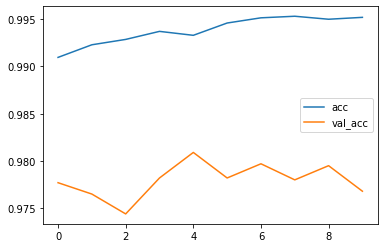

In [7]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend() # WHich line represents which 